In [11]:
import pandas as pd
import seaborn as sns
from datetime import timedelta
import matplotlib.pyplot as plt

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [14]:
survey_data = pd.read_csv('../data/library_survey_data.csv')
survey_data.columns = ['Datatime', 'visit_time', 'entry_lvl', 'visit_reason', 'year_of_study', 'usual_amt_time', 'exam_amt_time', 'lvl3_rate', 'lvl4_rate', 'lvl5_rate', 'lvl6_clb_rate', 'lvl6_wbs_rate', 'privacy_rate', 'crowd_lvl_rate', 'comfort_rate', 'scenery_rate', 'lighting_rate', 'ease_find_seat_rate', 'discussion_cubicles_rate', 'discussion_cubicles_privacy', 'discussion_cubicles_crowd', 'discussion_cubicles_comfort', 'discussion_cubicles_scenery', 'discussion_cubicles_lighting', 'discussion_cubicles_seat_finding', 'windowed_rate', 'windowed_privacy', 'windowed_crowd', 'windowed_comfort', 'windowed_scenery', 'windowed_lighting', 'windowed_seat_finding', 'diagonal_rate', 'diagonal_privacy', 'diagonal_crowd', 'diagonal_comfort', 'diagonal_scenery', 'diagonal_lighting', 'diagonal_seat_finding', 'cubicle_rate', 'cubicle_privacy', 'cubicle_crowd', 'cubicle_comfort', 'cubicle_scenery', 'cubicle_lighting', 'cubicle_seat_finding', '4-man_rate', '4-man_privacy', '4-man_crowd', '4-man_comfort', '4-man_scenery', '4-man_lighting', '4-man_seat_finding', '8-man_rate', '8-man_privacy', '8-man_crowd', '8-man_comfort', '8-man_scenery', '8-man_lighting', '8-man_seat_finding', 'soft_rate', 'soft_privacy', 'soft_crowd', 'soft_comfort', 'soft_scenery', 'soft_lighting', 'soft_seat_finding', 'sofa_rate', 'sofa_privacy', 'sofa_crowd', 'sofa_comfort', 'sofa_scenery', 'sofa_lighting', 'sofa_seat_finding', 'moveable_rate', 'moveable_privacy', 'moveable_crowd', 'moveable_comfort', 'moveable_scenery', 'moveable_lighting', 'moveable_seat_finding', 'acceptance_alternate_seat', 'crowded_lvl', 'lunch_time', 'group_size', 'acceptance_share_table', 'printer_only_frequency', 'hogging_duration', 'hogging_reason']


## Preprocessing of Survey Data

In [15]:
# # fill NA with 3 (neutral) for those that leave blank for rating
columns_to_fillna = ['lvl3_rate', 'lvl4_rate', 'lvl5_rate', 'lvl6_clb_rate', 'lvl6_wbs_rate', 'privacy_rate', 'crowd_lvl_rate', 'comfort_rate', 'scenery_rate', 'lighting_rate', 'ease_find_seat_rate', 'discussion_cubicles_rate', 'discussion_cubicles_privacy', 'discussion_cubicles_crowd', 'discussion_cubicles_comfort', 'discussion_cubicles_scenery', 'discussion_cubicles_lighting', 'discussion_cubicles_seat_finding', 'windowed_rate', 'windowed_privacy', 'windowed_crowd', 'windowed_comfort', 'windowed_scenery', 'windowed_lighting', 'windowed_seat_finding', 'diagonal_rate', 'diagonal_privacy', 'diagonal_crowd', 'diagonal_comfort', 'diagonal_scenery', 'diagonal_lighting', 'diagonal_seat_finding', 'cubicle_rate', 'cubicle_privacy', 'cubicle_crowd', 'cubicle_comfort', 'cubicle_scenery', 'cubicle_lighting', 'cubicle_seat_finding', '4-man_rate', '4-man_privacy', '4-man_crowd', '4-man_comfort', '4-man_scenery', '4-man_lighting', '4-man_seat_finding', '8-man_rate', '8-man_privacy', '8-man_crowd', '8-man_comfort', '8-man_scenery', '8-man_lighting', '8-man_seat_finding', 'soft_rate', 'soft_privacy', 'soft_crowd', 'soft_comfort', 'soft_scenery', 'soft_lighting', 'soft_seat_finding', 'sofa_rate', 'sofa_privacy', 'sofa_crowd', 'sofa_comfort', 'sofa_scenery', 'sofa_lighting', 'sofa_seat_finding', 'moveable_rate', 'moveable_privacy', 'moveable_crowd', 'moveable_comfort', 'moveable_scenery', 'moveable_lighting', 'moveable_seat_finding']
survey_data[columns_to_fillna] = survey_data[columns_to_fillna].fillna(value='3')

# convert all to lower case 
survey_data = survey_data.apply(lambda x: x.astype(str).str.lower() if x.dtype == 'O' else x)
 
# remove results where people do not visit library (visit_time does not contain am or pm)
survey_data = survey_data[survey_data['visit_time'].str.contains('AM|PM', case=False, na=False, regex=True)]

# make all numeric for ratings
survey_data[columns_to_fillna] = survey_data[columns_to_fillna].replace('1 - least preferred', '1')
survey_data[columns_to_fillna] = survey_data[columns_to_fillna].replace('5 - most preferred', '5')
for col in columns_to_fillna:
    survey_data[col] = pd.to_numeric(survey_data[col], errors='coerce')


In [16]:
df = survey_data[columns_to_fillna]
# df = survey_data[['privacy_rate', 'crowd_lvl_rate', 'comfort_rate', 'scenery_rate', 'lighting_rate', 'ease_find_seat_rate']]
df

,lvl3_rate,lvl4_rate,lvl5_rate,lvl6_clb_rate,lvl6_wbs_rate,privacy_rate,crowd_lvl_rate,comfort_rate,scenery_rate,lighting_rate,...,sofa_scenery,sofa_lighting,sofa_seat_finding,moveable_rate,moveable_privacy,moveable_crowd,moveable_comfort,moveable_scenery,moveable_lighting,moveable_seat_finding
0,2,3,3,3,3,4,4,5,3,5,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
1,2,3,3,3,3,3,3,4,2,2,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
2,2,3,1,1,1,2,3,3,1,2,...,1.0,3.0,1.0,3.0,2.0,3.0,3.0,1.0,3.0,2.0
3,3,2,5,4,4,5,3,4,2,4,...,3.0,3.0,3.0,1.0,1.0,1.0,2.0,2.0,3.0,4.0
4,4,4,4,4,2,4,4,4,2,4,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,3,3,3,1,1,1,3,1,3,3,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
251,4,5,3,3,3,2,3,4,2,3,...,3.0,3.0,3.0,2.0,2.0,4.0,3.0,3.0,4.0,3.0
252,2,2,4,1,1,4,5,4,3,4,...,2.0,3.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
253,3,3,3,3,3,1,1,1,1,1,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0


## Scaling and PCA

In order to find hidden patterns in library user behaviour

In [17]:
scaler =StandardScaler()
segmentation_std = scaler.fit_transform(df)
pca = PCA()
pca.fit(segmentation_std)

PCA()

In [18]:
pca.explained_variance_ratio_

array([0.2228104 , 0.0892432 , 0.06108769, 0.05593241, 0.03503688,
       0.03415115, 0.03205463, 0.02724861, 0.02421577, 0.02409069,
       0.0222241 , 0.01996492, 0.01827061, 0.01579417, 0.01532545,
       0.01481177, 0.01384294, 0.01333862, 0.01278254, 0.01213495,
       0.01113172, 0.01035332, 0.01030941, 0.00937281, 0.00913462,
       0.00902946, 0.0082971 , 0.00795509, 0.00785001, 0.00779761,
       0.00755702, 0.00684896, 0.00654569, 0.0064668 , 0.00623497,
       0.00613253, 0.00566972, 0.00536107, 0.0052743 , 0.00500865,
       0.00493069, 0.00449067, 0.00438654, 0.00434417, 0.00378043,
       0.00368502, 0.00344689, 0.0034109 , 0.00332994, 0.00318512,
       0.00305183, 0.00296763, 0.00287258, 0.00278708, 0.00254599,
       0.00246568, 0.00235928, 0.00223369, 0.00212983, 0.00202534,
       0.00199124, 0.00193007, 0.00177403, 0.00161787, 0.00155252,
       0.00151981, 0.00136312, 0.00132964, 0.00123592, 0.00113718,
       0.00104841, 0.00084943, 0.00079096, 0.00073816])

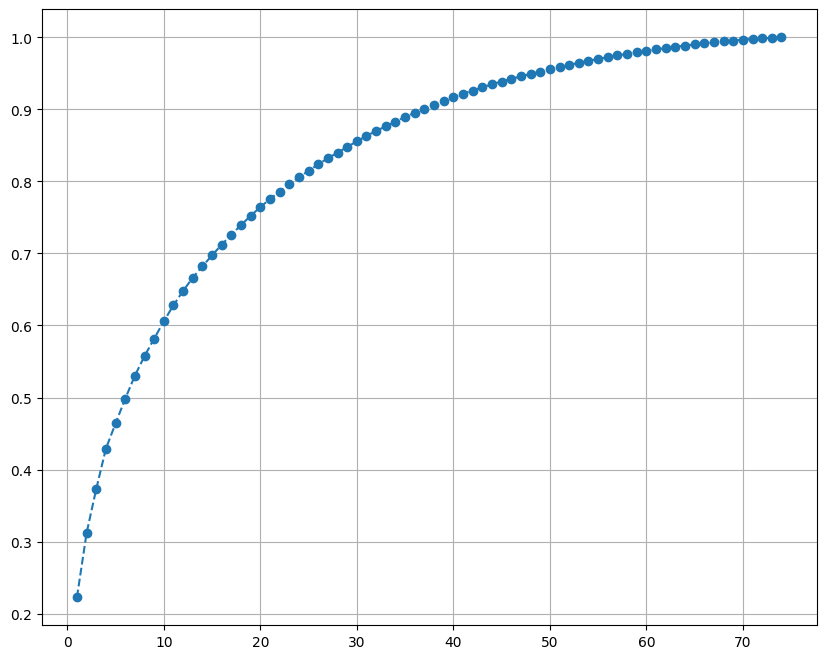

In [19]:
plt.figure(figsize=(10,8))
plt.grid(True)
plt.plot(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')

We can see that the explained variance ratio is very small when there are less than 3 or 4 components, hence variation in user behaviour might not be accurately described by a small number of parameters.